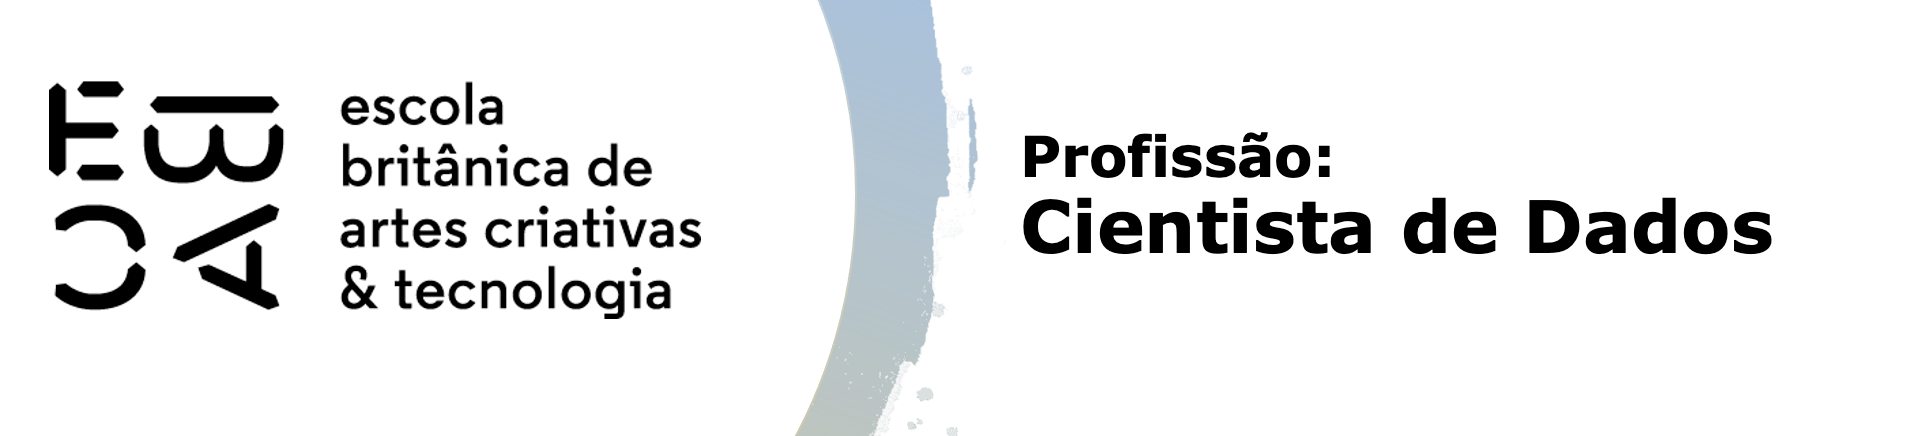

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

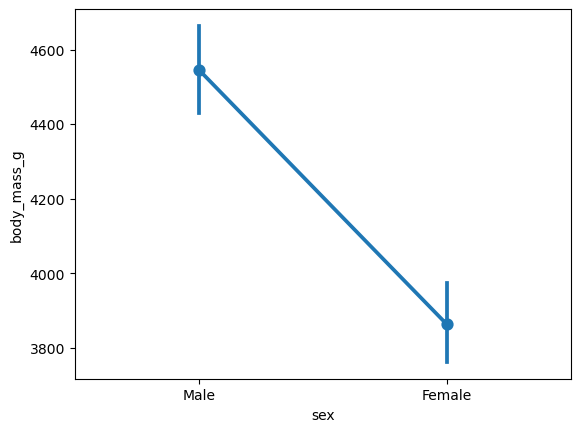

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [5]:
import pandas as pd
from scipy import stats
import seaborn as sns

# 1. Carregar o conjunto de dados dos pinguins
# A biblioteca seaborn possui este dataset famoso, facilitando o acesso.
df = sns.load_dataset('penguins')

# 2. Limpeza dos dados
# Removemos as linhas onde as colunas 'sex' ou 'body_mass_g' não têm valor (NaN)
# Isso é crucial para que o teste funcione corretamente.
df_cleaned = df.dropna(subset=['sex', 'body_mass_g'])

# 3. Separar os dados em dois grupos: machos e fêmeas
# Criamos duas séries, uma contendo apenas o peso dos machos e outra com o peso das fêmeas.
pesos_machos = df_cleaned[df_cleaned['sex'] == 'Male']['body_mass_g']
pesos_femeas = df_cleaned[df_cleaned['sex'] == 'Female']['body_mass_g']

# 4. Executar o Teste T para Amostras Independentes
# A função `ttest_ind` compara as médias dos dois grupos que criamos.
# Ela retorna a estatística t e o p-valor.
estatistica_t, p_valor = stats.ttest_ind(pesos_machos, pesos_femeas)

# 5. Definir o nível de significância (alfa)
# Este é o nosso limiar para decidir se o resultado é significativo.
alfa = 0.05

# 6. Imprimir os resultados e a conclusão
print(f"Estatística do Teste T: {estatistica_t:.4f}")
print(f"P-valor: {p_valor}")

# Comparamos o p-valor com o nosso nível de significância
if p_valor < alfa:
    print("\nConclusão: Rejeitamos a hipótese nula.")
    print("Há uma diferença estatisticamente significativa no peso entre pinguins machos e fêmeas.")
else:
    print("\nConclusão: Não podemos rejeitar a hipótese nula.")
    print("Não há evidências de uma diferença estatisticamente significativa no peso entre os sexos.")

Estatística do Teste T: 8.5417
P-valor: 4.897246751596224e-16

Conclusão: Rejeitamos a hipótese nula.
Há uma diferença estatisticamente significativa no peso entre pinguins machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

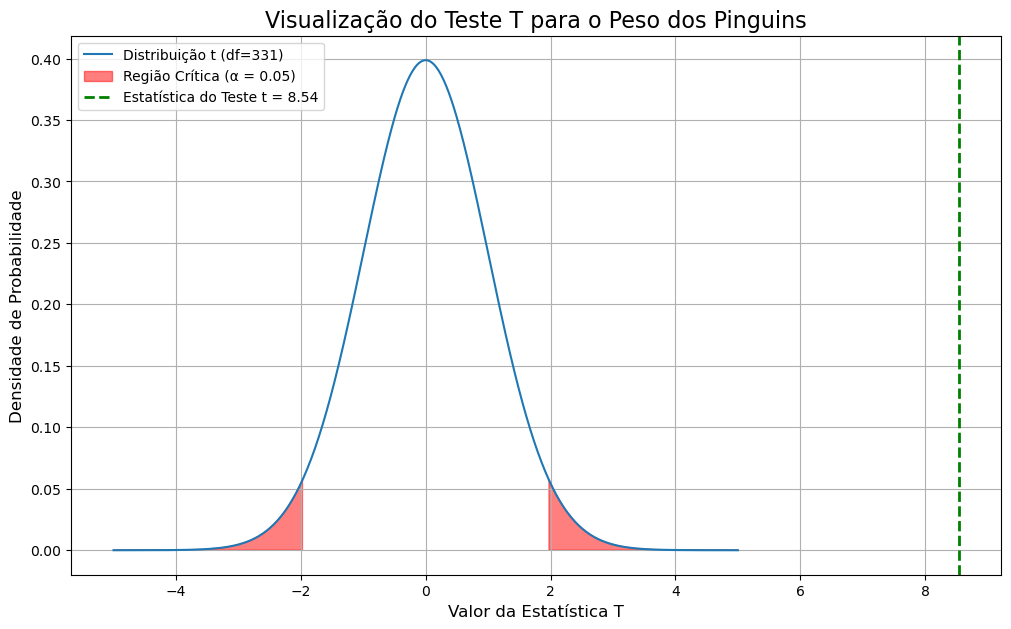

Estatística do Teste T calculada: 8.5417
Valor Crítico (limite da região vermelha): ±1.9672
P-valor: 4.897246751596224e-16


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# --- Passo 1: Carregar e Preparar os Dados ---
# Usamos a biblioteca seaborn para carregar o dataset 'penguins' facilmente.
df = sns.load_dataset('penguins')

# Removemos linhas onde 'sex' ou 'body_mass_g' são nulos.
df_cleaned = df.dropna(subset=['sex', 'body_mass_g'])

# Separamos os dados em dois grupos: machos e fêmeas.
pesos_machos = df_cleaned[df_cleaned['sex'] == 'Male']['body_mass_g']
pesos_femeas = df_cleaned[df_cleaned['sex'] == 'Female']['body_mass_g']

# --- Passo 2: Realizar o Teste T e Obter Parâmetros ---
# Calculamos a estatística T e o p-valor.
estatistica_t, p_valor = stats.ttest_ind(pesos_machos, pesos_femeas)

# Calculamos os graus de liberdade (necessário para a distribuição t).
graus_liberdade = len(pesos_machos) + len(pesos_femeas) - 2

# Definimos o nível de significância.
alfa = 0.05

# Calculamos o valor crítico que define a região de rejeição.
# Para um teste bicaudal, dividimos alfa por 2.
valor_critico = stats.t.ppf(1 - alfa / 2, df=graus_liberdade)

# --- Passo 3: Gerar o Gráfico ---
# Criamos um intervalo de valores no eixo X para plotar a curva.
x = np.linspace(-5, 5, 500)

# Calculamos a densidade de probabilidade (eixo Y) para cada ponto de X usando a distribuição t.
y = stats.t.pdf(x, df=graus_liberdade)

# Iniciamos a figura do gráfico.
plt.figure(figsize=(12, 7))

# Plotamos a curva da distribuição t.
plt.plot(x, y, label=f'Distribuição t (df={graus_liberdade})')

# Colorimos a região crítica (área de rejeição) em vermelho.
# A condição `where` colore apenas onde o valor de x é mais extremo que o valor crítico.
plt.fill_between(x, y, where=(x > valor_critico) | (x < -valor_critico),
                 color='red', alpha=0.5, label=f'Região Crítica (α = {alfa})')

# Adicionamos uma linha vertical verde para marcar onde a nossa estatística T calculada está.
plt.axvline(estatistica_t, color='green', linestyle='--', linewidth=2,
            label=f'Estatística do Teste t = {estatistica_t:.2f}')

# --- Passo 4: Adicionar Títulos e Legendas ---
plt.title('Visualização do Teste T para o Peso dos Pinguins', fontsize=16)
plt.xlabel('Valor da Estatística T', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend()
plt.grid(True)

# Exibimos o gráfico.
plt.show()

# Imprimimos os valores calculados para referência.
print(f"Estatística do Teste T calculada: {estatistica_t:.4f}")
print(f"Valor Crítico (limite da região vermelha): ±{valor_critico:.4f}")
print(f"P-valor: {p_valor}")

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [7]:
import pandas as pd
from scipy import stats
import seaborn as sns

# 1. Carregar o conjunto de dados dos pinguins
df = sns.load_dataset('penguins')

# 2. Limpeza inicial dos dados
# Removemos as linhas onde 'sex', 'body_mass_g' ou 'species' não têm valor
df_cleaned = df.dropna(subset=['sex', 'body_mass_g', 'species'])

# 3. Encontrar as espécies únicas no conjunto de dados
# O método .unique() nos dá uma lista de todas as espécies presentes.
especies = df_cleaned['species'].unique()

print("Realizando Teste T para diferença de peso entre machos e fêmeas para cada espécie:\n")

# 4. Loop para iterar sobre cada espécie
for especie in especies:
    print(f"--- Espécie: {especie} ---")

    # Filtra o DataFrame para conter apenas os dados da espécie atual
    df_especie = df_cleaned[df_cleaned['species'] == especie]

    # Separa os pesos de machos e fêmeas para a espécie atual
    pesos_machos = df_especie[df_especie['sex'] == 'Male']['body_mass_g']
    pesos_femeas = df_especie[df_especie['sex'] == 'Female']['body_mass_g']

    # Verifica se temos dados suficientes em ambos os grupos para o teste
    if len(pesos_machos) < 2 or len(pesos_femeas) < 2:
        print("Dados insuficientes para realizar o teste T para esta espécie.\n")
        continue

    # Realiza o Teste T para Amostras Independentes
    estatistica_t, p_valor = stats.ttest_ind(pesos_machos, pesos_femeas)

    # Imprime o p-valor formatado
    # A notação 'e' representa a notação científica (ex: 1.5e-07 = 0.00000015)
    print(f"P-valor: {p_valor}\n")

    # Interpretação do resultado com base em um nível de significância de 5%
    alfa = 0.05
    if p_valor < alfa:
        print(f"Conclusão: Para a espécie {especie}, a diferença de peso é estatisticamente significativa.\n")
    else:
        print(f"Conclusão: Para a espécie {especie}, não há evidência de diferença de peso significativa.\n")

Realizando Teste T para diferença de peso entre machos e fêmeas para cada espécie:

--- Espécie: Adelie ---
P-valor: 2.2206436307866114e-26

Conclusão: Para a espécie Adelie, a diferença de peso é estatisticamente significativa.

--- Espécie: Chinstrap ---
P-valor: 2.043956471470739e-06

Conclusão: Para a espécie Chinstrap, a diferença de peso é estatisticamente significativa.

--- Espécie: Gentoo ---
P-valor: 2.133687602018886e-28

Conclusão: Para a espécie Gentoo, a diferença de peso é estatisticamente significativa.

